In [37]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../')
from Functions import * 
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [46]:
num_samples = 410
alpha = 1
dim = 2

In [47]:
def LR(x):
    return np.exp(-x/70)*0.01+0.00001

In [48]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))

MLL_final = np.zeros(len(random_numbers_matrix)) # Define the MLL
grad_sum_final = np.zeros(len(random_numbers_matrix)) # Define the gradient sum

for s in range(1):
    Y_updated = np.delete(Y, random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 100000002
    grad = 0
    n = 100000
    points_copy = copy.deepcopy(points)
    MLL = np.zeros(n) # Define the MLL
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.01:
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        MLL[k] = Loss_function_prior_fast(points_copy,Y_updated,dim,alpha) # Calcualte the probability using Loss_function
        k += 1
    
    print(s)

    MLL_final[s] = MLL[k-1]
    grad_sum_final[s] = grad_sum[k-1]

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))

100000002
-601599.209074201
370616.4632412876
70126.77688573464
32885.226260542724
16067.22744345195
7928.424323604093
4767.35953609283
4549.436297734195
6464.338546292274
7759.4539872156165
7801.870000123832
6681.601690577474
5697.051573954333
5141.22710007873
4474.353485148567
3950.8470519963303
3878.7935972113482
3659.871081913647
3163.0310345229955
2771.6535509766545
2542.068999074949
2292.469445985156
1954.673439439619
1620.7298633707505
1402.5354140126583
1312.4866737012999
1269.963803771836
1201.3633344180707
1097.889047588822
987.9333808207448
901.0131892076679
844.7410977742038
801.8388259645744
756.5484463289085
712.9116926689676
679.4077445328821
650.0546942860146
608.8495034891093
547.1534269284693
471.3644650859005
395.0059955207071
327.5698752030967
271.1550143438617
223.74981362730978
183.4951673201922
150.75936735071446
127.56583392508037
115.7144087882225
115.16231322904241
123.45097736470962
136.4228892592946
149.85796605537507
160.97418133637348
169.06496782242903
17

KeyboardInterrupt: 

In [28]:
conf_matrix = np.array([[np.mean(True_posetiv), np.mean(False_negativ)],
                        [np.mean(False_posetiv), np.mean(True_negativ)]])
conf_matrix_baseline = np.array([[np.mean(True_posetiv_baseline), np.mean(False_negativ_baseline)],
                        [np.mean(False_posetiv_baseline), np.mean(True_negativ_baseline)]])

In [51]:
(True_posetiv[s]+True_negativ[s])/(len(sigmoid_value)) #0.9555104961832062

0.9567032442748091

In [52]:
np.array([[True_posetiv[s], False_negativ[s]],
        [False_posetiv[s], True_negativ[s]]])

array([[ 176.,  103.],
       [ 260., 7845.]])

In [53]:
precision = True_posetiv[s]/(True_posetiv[s]+False_posetiv[s])
precision_baseline = True_posetiv_baseline[s]/(True_posetiv_baseline[s]+False_posetiv_baseline[s])
Recall = True_posetiv[s]/(True_posetiv[s]+False_negativ[s])
Recall_baseline = True_posetiv_baseline[s]/(True_posetiv_baseline[s]+False_negativ_baseline[s])

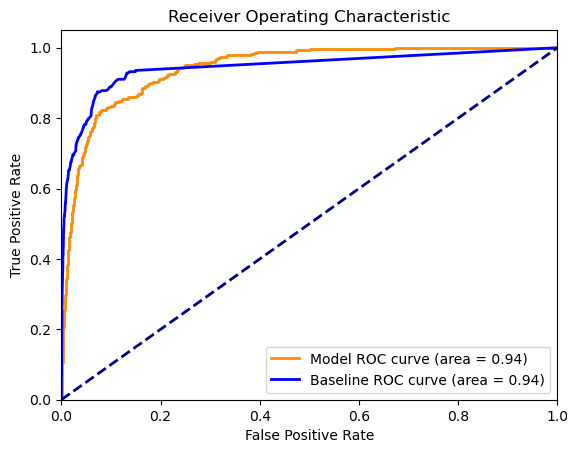

In [54]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve for both models
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

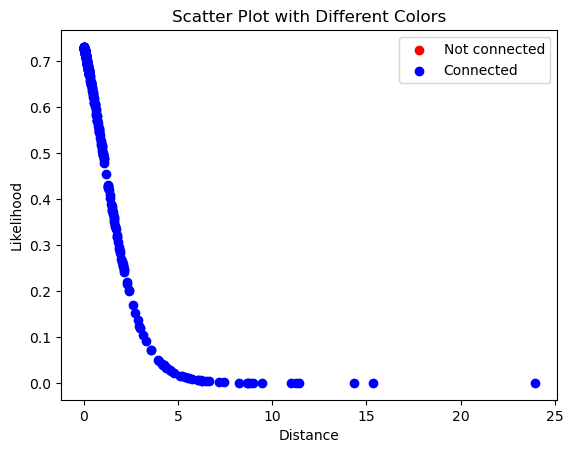

In [55]:
plt.scatter(distances[connections == -1], sigmoid_value[connections == -1], color='red', label='Not connected')
plt.scatter(distances[connections == 1], sigmoid_value[connections == 1], color='blue', label='Connected')
plt.xlabel('Distance')
#plt.xlim(4,5)
plt.ylabel('Likelihood')
plt.title('Scatter Plot with Different Colors')
plt.legend()
plt.show()


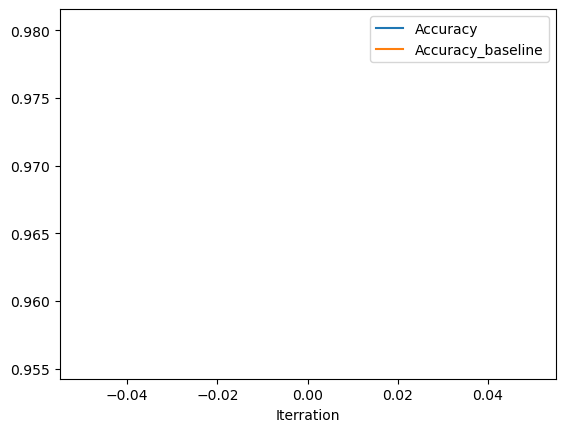

In [35]:
plt.plot(Accuracy,label='Accuracy')
plt.plot(Accuracy_baseline, label='Accuracy_baseline')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

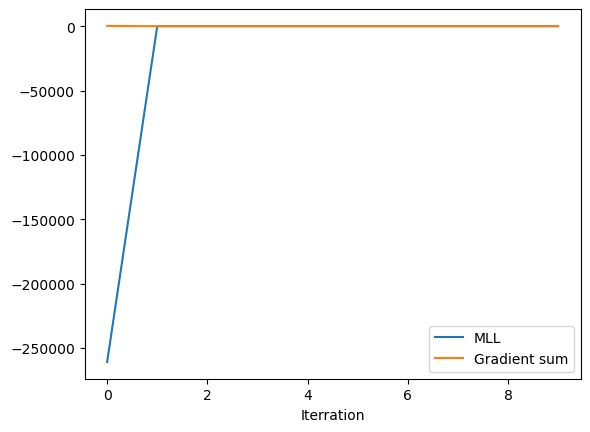

In [14]:
plt.plot(MLL_final,label='MLL')
plt.plot(np.sqrt(grad_sum_final), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

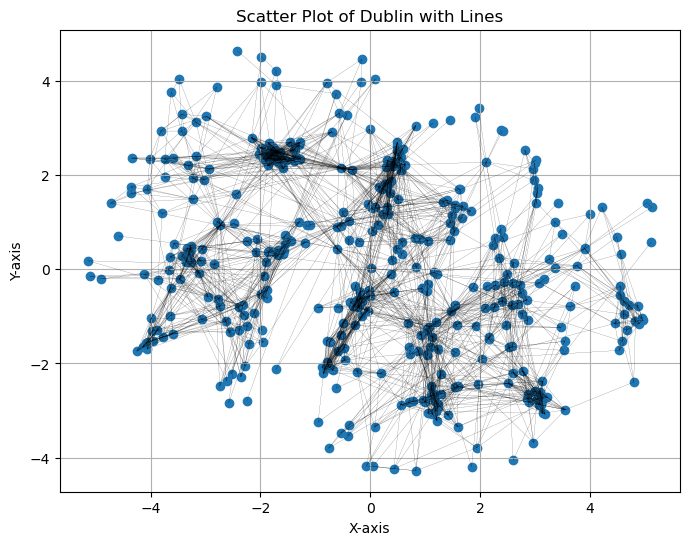

In [56]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.1) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dublin with Lines')
plt.grid(True)
plt.show()